In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, Conv3D
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

img_rows, img_cols, img_depth = 16, 16, 15

X_tr = []

listing = os.listdir('datasets/kth/boxing')

for vid in listing:
    vid = 'datasets/kth/boxing/' + vid
    frames = []
    cap = cv2.VideoCapture(vid)
    fps = cap.get(5)
    
    for k in range(15):
        ret, frame = cap.read()
        frame = cv2.resize(frame, (img_rows, img_cols), interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()
    
    input = np.array(frames)
    
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    # print(ipt.shape)
    
    X_tr.append(ipt)
print('boxing done')

listing2 = os.listdir('datasets/kth/handclapping')

for vid2 in listing2:
    vid2 = 'datasets/kth/handclapping/' + vid2
    frames = []
    cap = cv2.VideoCapture(vid2)
    fps = cap.get(5)
    
    for k in range(15):
        ret, frame = cap.read()
        frame = cv2.resize(frame, (img_rows, img_cols), interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()
    
    input = np.array(frames)
    
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    
    X_tr.append(ipt)
print('handclapping done')

listing3 = os.listdir('datasets/kth/handwaving')

for vid3 in listing3:
    vid3 = 'datasets/kth/handwaving/'+vid3
    frames = []
    cap = cv2.VideoCapture(vid3)
    fps = cap.get(5)
    #print "Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps)

    for k in range(15):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)

        #plt.imshow(gray, cmap = plt.get_cmap('gray'))
        #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        #plt.show()
        #cv2.imshow('frame',gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    input=np.array(frames)

    #print input.shape
    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    # print(ipt.shape) #(16,16,15)

    X_tr.append(ipt)

print("handwaving done")


listing4 = os.listdir('datasets/kth/jogging')

for vid4 in listing4:
    vid4 = 'datasets/kth/jogging/'+vid4
    frames = []
    cap = cv2.VideoCapture(vid4)
    fps = cap.get(5)
    #print "Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps)

    for k in range(15):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)

        #plt.imshow(gray, cmap = plt.get_cmap('gray'))
        #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        #plt.show()
        #cv2.imshow('frame',gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    input=np.array(frames)

    #print input.shape
    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    #print ipt.shape #(16,16,15)

    X_tr.append(ipt)

print("jogging done")

listing5 = os.listdir('datasets/kth/running')

for vid5 in listing5:
    vid5 = 'datasets/kth/running/'+vid5
    frames = []
    cap = cv2.VideoCapture(vid5)
    fps = cap.get(5)
    #print "Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps)

    for k in range(15):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)

#         plt.imshow(gray, cmap = plt.get_cmap('gray'))
#         plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#         plt.show()
#        cv2.imshow('frame',gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    input=np.array(frames)

    #print input.shape
    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    #print ipt.shape #(16,16,15)

    X_tr.append(ipt)

print("running done")

listing6 = os.listdir('datasets/kth/walking')

for vid6 in listing6:
    vid6 = 'datasets/kth/walking/'+vid6
    frames = []
    cap = cv2.VideoCapture(vid6)
    fps = cap.get(5) # cv2.cv.CV_CAP_PROP_FPS ; cv2.CAP_PROP_FPS
    #print "Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps)

    for k in range(15):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)

        #plt.imshow(gray, cmap = plt.get_cmap('gray'))
        #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        #plt.show()
        #cv2.imshow('frame',gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    input=np.array(frames)

    #print input.shape
    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    # print(ipt.shape) #(16,16,15)

    X_tr.append(ipt)

print("walking done")

/home/xd/ws/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/xd/ws/tf/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


boxing done
handclapping done
handwaving done
jogging done
running done
walking done


In [2]:
X_tr_array = np.array(X_tr)

num_samples = len(X_tr_array)
print(num_samples)


599


In [3]:
label = np.ones((num_samples,), dtype = int)
label[0:100] = 0
label[100:199] = 1
label[199:299] = 2
label[299:399] = 3
label[399:499] = 4
label[499:] = 5

In [4]:
train_data = [X_tr_array, label]
X_train, y_train = train_data[0], train_data[1]

In [5]:
print('X_train shape', X_train.shape)

X_train shape (599, 16, 16, 15)


In [6]:
train_set = np.zeros((num_samples, 1, img_rows, img_cols, img_depth))

In [7]:
for h in range(num_samples):
    train_set[h][0][:][:][:] = X_train[h,:,:,:]
    
patch_size = 15
train_set = np.swapaxes(train_set, 1, 4)
print(train_set.shape, 'train samples')

(599, 15, 16, 16, 1) train samples


In [8]:
batch_size = 8
nb_classes = 6
nb_epoch = 100

Y_train = np_utils.to_categorical(y_train, nb_classes)

nb_filters = [32, 32]
nb_pool = [2, 2]
nb_conv = [5, 5]

train_set = train_set.astype('float32')
train_set -= np.mean(train_set)
train_set /= np.max(train_set)

In [11]:
model = Sequential()
print(nb_filters[0], 'filters')
print('input shape', img_rows, 'rows', img_cols, 'cols', patch_size, 'patchsize')

model.add(Conv3D(16,
                 (5, # depth
                  5, # rows
                  5), # cols
                 input_shape=(patch_size, img_rows, img_cols, 1),
                 activation='relu',
                 padding='SAME',
))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Dropout(0.5))
model.add(Conv3D(32,
                 (3, # depth
                  3, # rows
                  3), # cols
                 activation='relu',
                 padding='SAME',
))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(84, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, kernel_initializer='normal'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['mse', 'accuracy'])

32 filters
input shape 16 rows 16 cols 15 patchsize


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 15, 16, 16, 16)    2016      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 7, 8, 8, 16)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 8, 8, 16)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 7, 8, 8, 32)       13856     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 3, 4, 4, 32)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 4, 4, 32)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
__________

In [59]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

hist = model.fit(
X_train_new,
y_train_new,
validation_data=(X_val_new, y_val_new),
batch_size=batch_size,
epochs=nb_epoch,
shuffle=True
)

Train on 479 samples, validate on 120 samples
Epoch 1/100
479/479 [==============================] - 1s 2ms/step - loss: 1.6502 - mean_squared_error: 0.1342 - acc: 0.2589 - val_loss: 1.2902 - val_mean_squared_error: 0.1146 - val_acc: 0.3833
Epoch 2/100
479/479 [==============================] - 0s 992us/step - loss: 1.3709 - mean_squared_error: 0.1215 - acc: 0.3695 - val_loss: 1.2284 - val_mean_squared_error: 0.1153 - val_acc: 0.4000
Epoch 3/100
479/479 [==============================] - 0s 966us/step - loss: 1.2731 - mean_squared_error: 0.1176 - acc: 0.3904 - val_loss: 1.1916 - val_mean_squared_error: 0.1147 - val_acc: 0.3500
Epoch 4/100
479/479 [==============================] - 0s 966us/step - loss: 1.1722 - mean_squared_error: 0.1101 - acc: 0.4322 - val_loss: 1.0643 - val_mean_squared_error: 0.1010 - val_acc: 0.5167
Epoch 5/100
479/479 [==============================] - 0s 970us/step - loss: 1.0902 - mean_squared_error: 0.1016 - acc: 0.4885 - val_loss: 1.0920 - val_mean_squared_err

479/479 [==============================] - 0s 963us/step - loss: 0.2969 - mean_squared_error: 0.0277 - acc: 0.8873 - val_loss: 1.6083 - val_mean_squared_error: 0.0959 - val_acc: 0.6417
Epoch 84/100
479/479 [==============================] - 0s 957us/step - loss: 0.3231 - mean_squared_error: 0.0285 - acc: 0.8789 - val_loss: 1.3655 - val_mean_squared_error: 0.0900 - val_acc: 0.6417
Epoch 85/100
479/479 [==============================] - 0s 952us/step - loss: 0.2922 - mean_squared_error: 0.0250 - acc: 0.9081 - val_loss: 1.7297 - val_mean_squared_error: 0.0999 - val_acc: 0.6333
Epoch 86/100
479/479 [==============================] - 0s 984us/step - loss: 0.3270 - mean_squared_error: 0.0297 - acc: 0.8810 - val_loss: 1.8527 - val_mean_squared_error: 0.1009 - val_acc: 0.6333
Epoch 87/100
479/479 [==============================] - 0s 960us/step - loss: 0.3109 - mean_squared_error: 0.0276 - acc: 0.8894 - val_loss: 1.2638 - val_mean_squared_error: 0.0845 - val_acc: 0.6667
Epoch 88/100
479/479 [=

In [60]:
score = model.evaluate(
X_val_new,
y_val_new,
batch_size=batch_size,
)

120/120 [==============================] - 0s 306us/step


In [61]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

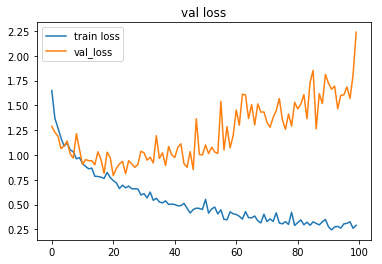

In [62]:
plt.plot(train_loss); plt.title('train loss')
plt.plot(val_loss); plt.title('val loss')
plt.legend(['train loss', 'val_loss'])

(0, 1)

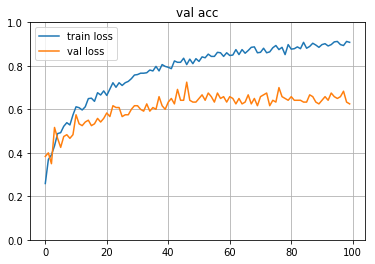

In [63]:
plt.plot(train_acc); plt.title('train acc')
plt.plot(val_acc); plt.title('val acc')
plt.legend(['train loss', 'val loss'])
plt.grid(True)
plt.ylim(0,1)

In [15]:
# write results to file
import datetime
now = str(datetime.datetime.now()).split('.')[0]
filename = now
filename = filename.replace(' ','_').replace(':','-')
filename = filename + '.' + str(nb_epoch) + 'e'
target = open(filename, 'w')
target.write('train_loss\n')
target.write(str(train_loss))
target.write('\nval_loss\n')
target.write(str(val_loss))
target.write('\ntrain_acc\n')
target.write(str(train_acc))
target.write('\nval_acc\n')
target.write(str(val_acc))
target.close()
